In [97]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [98]:
fords=pd.read_csv('fords.csv')
fords.head()

,Year,Mileage,Price,Color,Location,Model,Age
0,1990,NaN,1600.0,NaN,Phoenix,NaN,19
1,1994,94000.0,1988.0,white,Phoenix,GL,15
2,1995,NaN,2288.0,white,Phoenix,NaN,14
3,1995,68000.0,2495.0,NaN,Phoenix,NaN,14
4,1995,NaN,1995.0,NaN,Phoenix,GL,14


In [99]:
fords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 7 columns):
Year        635 non-null int64
Mileage     616 non-null float64
Price       629 non-null float64
Color       625 non-null object
Location    635 non-null object
Model       627 non-null object
Age         635 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 34.8+ KB


In [100]:
fords.describe()

,Year,Mileage,Price,Age
count,635.000000,616.000000,6.290000e+02,635.000000
mean,2004.886614,56015.571429,2.531353e+04,4.280315
std,4.989553,34145.828077,3.983778e+05,3.284152
min,1990.000000,42.000000,1.200000e+03,0.000000
25%,2003.000000,31772.750000,5.995000e+03,2.000000
50%,2006.000000,48897.500000,8.950000e+03,3.000000
75%,2007.000000,74503.250000,1.169000e+04,6.000000
max,2100.000000,181484.000000,9.999999e+06,19.000000


In [101]:
# Encoding
fords= pd.get_dummies(fords)
fords.head()

,Year,Mileage,Price,Age,Color_beige,Color_black,Color_blue,Color_brown,Color_burgundy,Color_gold,...,Location_Fresno,Location_Philadelphia,Location_Phoenix,Location_St Paul,Model_GL,Model_LX,Model_Limited,Model_SE,Model_SEL,Model_SES
0,1990,NaN,1600.0,19,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1994,94000.0,1988.0,15,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1995,NaN,2288.0,14,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1995,68000.0,2495.0,14,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1995,NaN,1995.0,14,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [102]:
#missing
rows=['Year','Mileage','Price','Age']
for numerical_row in rows:
    imr_mean = SimpleImputer(strategy='mean')
    imr_mean = imr_mean.fit(fords[[numerical_row]])
    fords[numerical_row] = imr_mean.transform(fords[[numerical_row]]).ravel()
fords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 26 columns):
Year                     635 non-null float64
Mileage                  635 non-null float64
Price                    635 non-null float64
Age                      635 non-null float64
Color_beige              635 non-null uint8
Color_black              635 non-null uint8
Color_blue               635 non-null uint8
Color_brown              635 non-null uint8
Color_burgundy           635 non-null uint8
Color_gold               635 non-null uint8
Color_gray               635 non-null uint8
Color_green              635 non-null uint8
Color_red                635 non-null uint8
Color_white              635 non-null uint8
Location_Cambridge       635 non-null uint8
Location_Dallas          635 non-null uint8
Location_Fresno          635 non-null uint8
Location_Philadelphia    635 non-null uint8
Location_Phoenix         635 non-null uint8
Location_St Paul         635 non-null uint8
Model_G

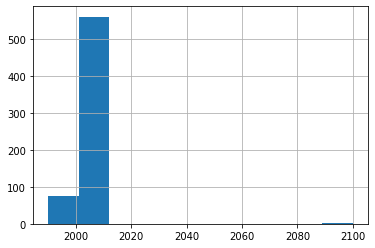

In [63]:
#outliers
fords.Year.hist()
plt.show()


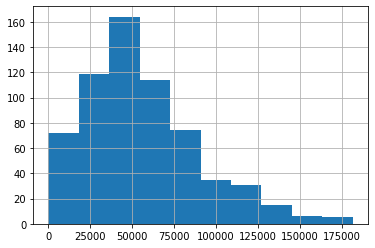

In [64]:
fords.Mileage.hist()
plt.show()

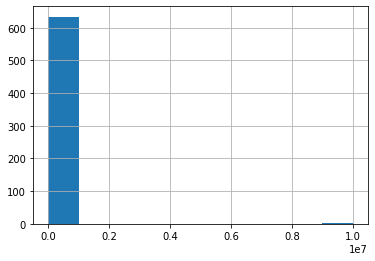

In [65]:
fords.Price.hist()
plt.show()

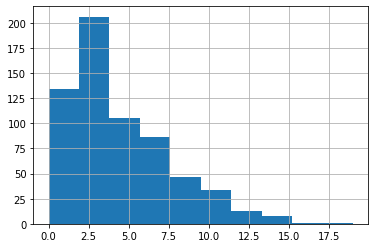

In [66]:
#outliers
fords.Age.hist()
plt.show()

In [103]:
fords=fords.loc[~((fords.Price>8000000)|
                  (fords.Year>2080)),]

In [104]:
# Standardization
scaler = preprocessing.MinMaxScaler()
fords[['Year','Mileage','Price','Age']] = scaler.fit_transform(fords[['Year','Mileage','Price','Age']])
fords.head()

,Year,Mileage,Price,Age,Color_beige,Color_black,Color_blue,Color_brown,Color_burgundy,Color_gold,...,Location_Fresno,Location_Philadelphia,Location_Phoenix,Location_St Paul,Model_GL,Model_LX,Model_Limited,Model_SE,Model_SEL,Model_SES
0,0.000000,0.308493,0.016588,1.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.210526,0.517840,0.032679,0.789474,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0.263158,0.308493,0.045120,0.736842,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.263158,0.374544,0.053704,0.736842,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.263158,0.308493,0.032969,0.736842,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [105]:
#normalization
fords[['Year','Mileage','Price','Age']] = preprocessing.normalize(fords[[
    'Year','Mileage','Price','Age']])
fords.head()

,Year,Mileage,Price,Age,Color_beige,Color_black,Color_blue,Color_brown,Color_burgundy,Color_gold,...,Location_Fresno,Location_Philadelphia,Location_Phoenix,Location_St Paul,Model_GL,Model_LX,Model_Limited,Model_SE,Model_SEL,Model_SES
0,0.000000,0.294748,0.015849,0.955444,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.217510,0.535018,0.033763,0.815662,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0.312445,0.366271,0.053570,0.874845,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.302789,0.430950,0.061792,0.847810,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.312654,0.366516,0.039170,0.875431,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [96]:
#binning
est = preprocessing.KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
est.fit(fords[['Year','Mileage','Price','Age']])
fords[['Year','Mileage','Price','Age']] = est.transform(fords[['Year','Mileage','Price','Age']])
fords.head()

,Year,Mileage,Price,Age,Color_beige,Color_black,Color_blue,Color_brown,Color_burgundy,Color_gold,...,Location_Fresno,Location_Philadelphia,Location_Phoenix,Location_St Paul,Model_GL,Model_LX,Model_Limited,Model_SE,Model_SEL,Model_SES
0,0.0,5.0,0.0,9.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.0,5.0,0.0,9.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0.0,5.0,0.0,9.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,5.0,0.0,9.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,5.0,0.0,9.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
